In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [50]:
data = pd.read_csv("sensor_mcadressOLAP.csv")

df = pd.DataFrame(data)

In [51]:
feature1 = 'idsensor'
feature2 = 'sexon'

x= df['idsensor']
y= df['sexon']

In [52]:
data = data.dropna(subset=['idsensor','sexon','mes'], how='any')

In [53]:
data_x = data[[feature1,feature2]]
data_y = data.mes

In [54]:
scaler = StandardScaler()
scaler.fit(data_x)

C:\Users\migue\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [55]:
RegresionL = LogisticRegression()
RegresionL.fit(scaler.transform(data_x),data_y)

C:\Users\migue\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  
C:\Users\migue\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\migue\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [56]:
data_test = pd.read_csv('sensor_mcadressOLAP.csv')
print(data_test.count())
data_result = pd.read_csv('sensor_mcadressOLAP.csv')
data_test = data_test.merge(data_result)

mcadress    3170
idsensor    3170
mes         3170
nombre      3170
apellido    3170
sexon       3170
edad        3170
sexo        3170
dtype: int64


In [57]:
data_test = data_test.interpolate()

In [58]:
data_test_x = data_test[['idsensor','sexon']]
data_test_y = data_test.mes

In [59]:
RegresionL.score(scaler.transform(data_test_x),data_test_y)

C:\Users\migue\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


0.12008978675645342

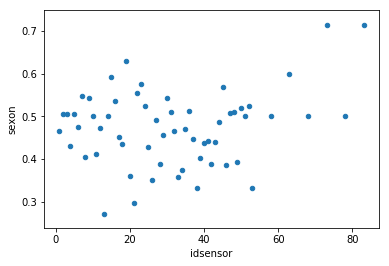

In [60]:
data[['idsensor', 'sexon']].groupby(['idsensor'],as_index=False).mean().plot.scatter('idsensor','sexon')
plt.show()

In [61]:
X = x[:,np.newaxis]

In [62]:
X

array([[5],
       [2],
       [5],
       ...,
       [7],
       [7],
       [5]], dtype=int64)

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, y_test = train_test_split(X,y, test_size=0.1) #set de entrenamiento y set de validacion

In [64]:
modelo = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3,3),random_state=1)
modelo.fit(X_train,Y_train)
print(modelo.score(X_train,Y_train))

0.00033625041317109083


In [65]:
while True:   
  modelo = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3,3),random_state=1)
  modelo.fit(X_train,Y_train)
  print(modelo.score(X_train,Y_train))
  if modelo.score(X_train,Y_train) < 0.62:
    break #termina de correr

0.00033625041317109083


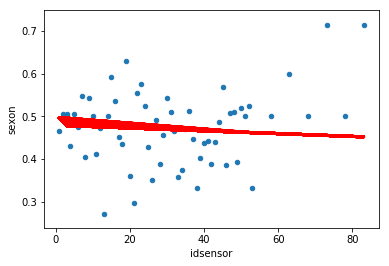

In [66]:
data[['idsensor', 'sexon']].groupby(['idsensor'],as_index=False).mean().plot.scatter('idsensor','sexon')
plt.plot(X, modelo.predict(X), color='red', linewidth=3)
plt.show()

NameError: name 'X2' is not defined

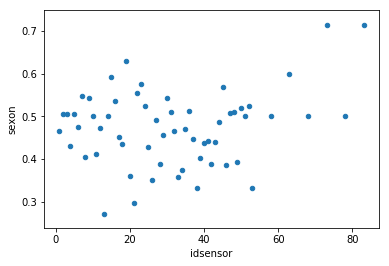

In [67]:
data[['idsensor', 'sexon']].groupby(['idsensor'],as_index=False).mean().plot.scatter('idsensor','sexon')
plt.plot(X2, modelo.predict(X2), color='red', linewidth=3)
plt.show()